In [1]:
#Importaciones

#fundamentales
import pandas as pd

# Graficas
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 
from keras_visualizer import visualizer

# Modelado
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

# #Config 
import warnings
warnings.filterwarnings('ignore')


2023-03-01 17:53:43.431744: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path_to_save = 'diabetes'
df = pd.read_csv('diabetes.csv')
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [3]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
print(df.describe(include='all'))

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  

In [4]:
dfs = preprocessing.scale(df)
dfs = pd.DataFrame(dfs, columns=df.columns)
dfs['Outcome'] = df['Outcome'] #se regresa el outcome al varlo original
dfsp = dfs.sample(frac=0.05, random_state=200)
dfs = dfs.drop(dfsp.index)

X = dfs.loc[:, dfs.columns != 'Outcome']
y = dfs.loc[:, 'Outcome']

X_pred = dfsp.loc[:, dfs.columns != 'Outcome']
y_test_predicted = dfsp.loc[:, 'Outcome'].reset_index()

# print(dfs.describe())
print(dfs.shape)
print(dfsp.shape)

(730, 9)
(38, 9)


In [5]:
def test_network(model,filename,X,y,X_pred,y_test_predicted,test_size=0.2,optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']):
    
    result_test = pd.DataFrame([],columns=['predicted','real'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    _ = model.compile(optimizer=optimizer,loss=loss,metrics=metrics)
    _ = model.fit(X_train, y_train, batch_size=10, epochs=100, verbose=0)
    scores_train = model.evaluate(X_train, y_train,verbose=0)
    scores_test = model.evaluate(X_test, y_test,verbose=0)
    path = path_to_save+'/'+filename
    _= visualizer(model, format='png', filename=path)

    X_pred_scaled = preprocessing.scale(X_pred)
    X_pred_scaled = pd.DataFrame(X_pred_scaled, columns=X_pred.columns)
    X_pred = X_pred_scaled
    predictions = model.predict(X_pred, verbose=0)

    for i,p in enumerate(predictions):
        row = pd.DataFrame([{'predicted':p[0],'real':y_test_predicted['Outcome'][i]}],columns=['predicted','real'])
        result_test = pd.concat([result_test,row],ignore_index=True)


    return scores_train,scores_test,result_test 

In [6]:
list_models_test = [
    {
        'Descripcion' : '1 capa de entrada con 8 nodos, 2 capas ocultas de 8 nodos y 1 capa de salidad con 1 nodo',
        'model':Sequential([
            Dense(8,activation='relu',input_dim=8),
            Dense(8,activation='relu'),
            Dense(1,activation='sigmoid')
        ])
    },
    {
        'Descripcion' : '1 capa de entrada con 8 nodos, 3 capas ocultas de 8 nodos y 1 capa de salidad con 1 nodo',
        'model':Sequential([
            Dense(8,activation='relu',input_dim=8),
            Dense(8,activation='relu'),
            Dense(8,activation='relu'),
            Dense(8,activation='relu'),
            Dense(8,activation='relu'),
            Dense(8,activation='relu'),
            Dense(1,activation='sigmoid')
        ])
    },
    {
        'Descripcion' : '1 capa de entrada con 8 nodos, 2 capas ocultas de 16 nodos y 1 capa de salidad con 1 nodo',
        'model':Sequential([
            Dense(16,activation='relu',input_dim=8),
            Dense(16,activation='relu'),
            Dense(1,activation='sigmoid')
        ])
    },
    {
       'Descripcion' : '1 capa de entrada con 8 nodos, 4 capas ocultas de 16 nodos y 1 capa de salidad con 1 nodo',
       'model': Sequential([
            Dense(16,activation='relu',input_dim=8),
            Dense(16,activation='relu'),
            Dense(16,activation='relu'),
            Dense(16,activation='relu'),
            Dense(1,activation='sigmoid')
        ])
    },
    {
        'Descripcion' : '1 capa de entrada con 8 nodos, 2 capas ocultas de 32 y 16 nodos y 1 capa de salidad con 1 nodo',
        'model':Sequential([
            Dense(32,activation='relu',input_dim=8),
            Dense(16,activation='relu'),
            Dense(1,activation='sigmoid')
        ])
    },
    {
        'Descripcion' : '1 capa de entrada con 8 nodos, 2 capas ocultas de 10 y 20 nodos y 1 capa de salidad con 1 nodo',
        'model':Sequential([
            Dense(10,activation='relu',input_dim=8),
            Dense(20,activation='relu'),
            Dense(10,activation='relu'),
            Dense(1,activation='sigmoid')
        ])
    },
    {
       'Descripcion' : '1 capa de entrada con 8 nodos, 3 capas ocultas, 2 de 32 y 1 de 16 nodos y 1 capa de salidad con 1 nodo',
        'model':Sequential([
            Dense(32,activation='relu',input_dim=8),
            Dense(32,activation='relu'),
            Dense(16,activation='relu'),
            Dense(1,activation='sigmoid')
        ])
    },
    {
        'Descripcion' : '1 capa de entrada con 8 nodos, 6 capas ocultas, 5 de 32 y 1 de 16 nodos y 1 capa de salidad con 1 nodo',
        'model':Sequential([
            Dense(32,activation='relu',input_dim=8),
            Dense(32,activation='relu'),
            Dense(32,activation='relu'),
            Dense(32,activation='relu'),
            Dense(32,activation='relu'),
            Dense(16,activation='relu'),
            Dense(1,activation='sigmoid')
        ])
    }
]

2023-03-01 17:54:02.231489: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


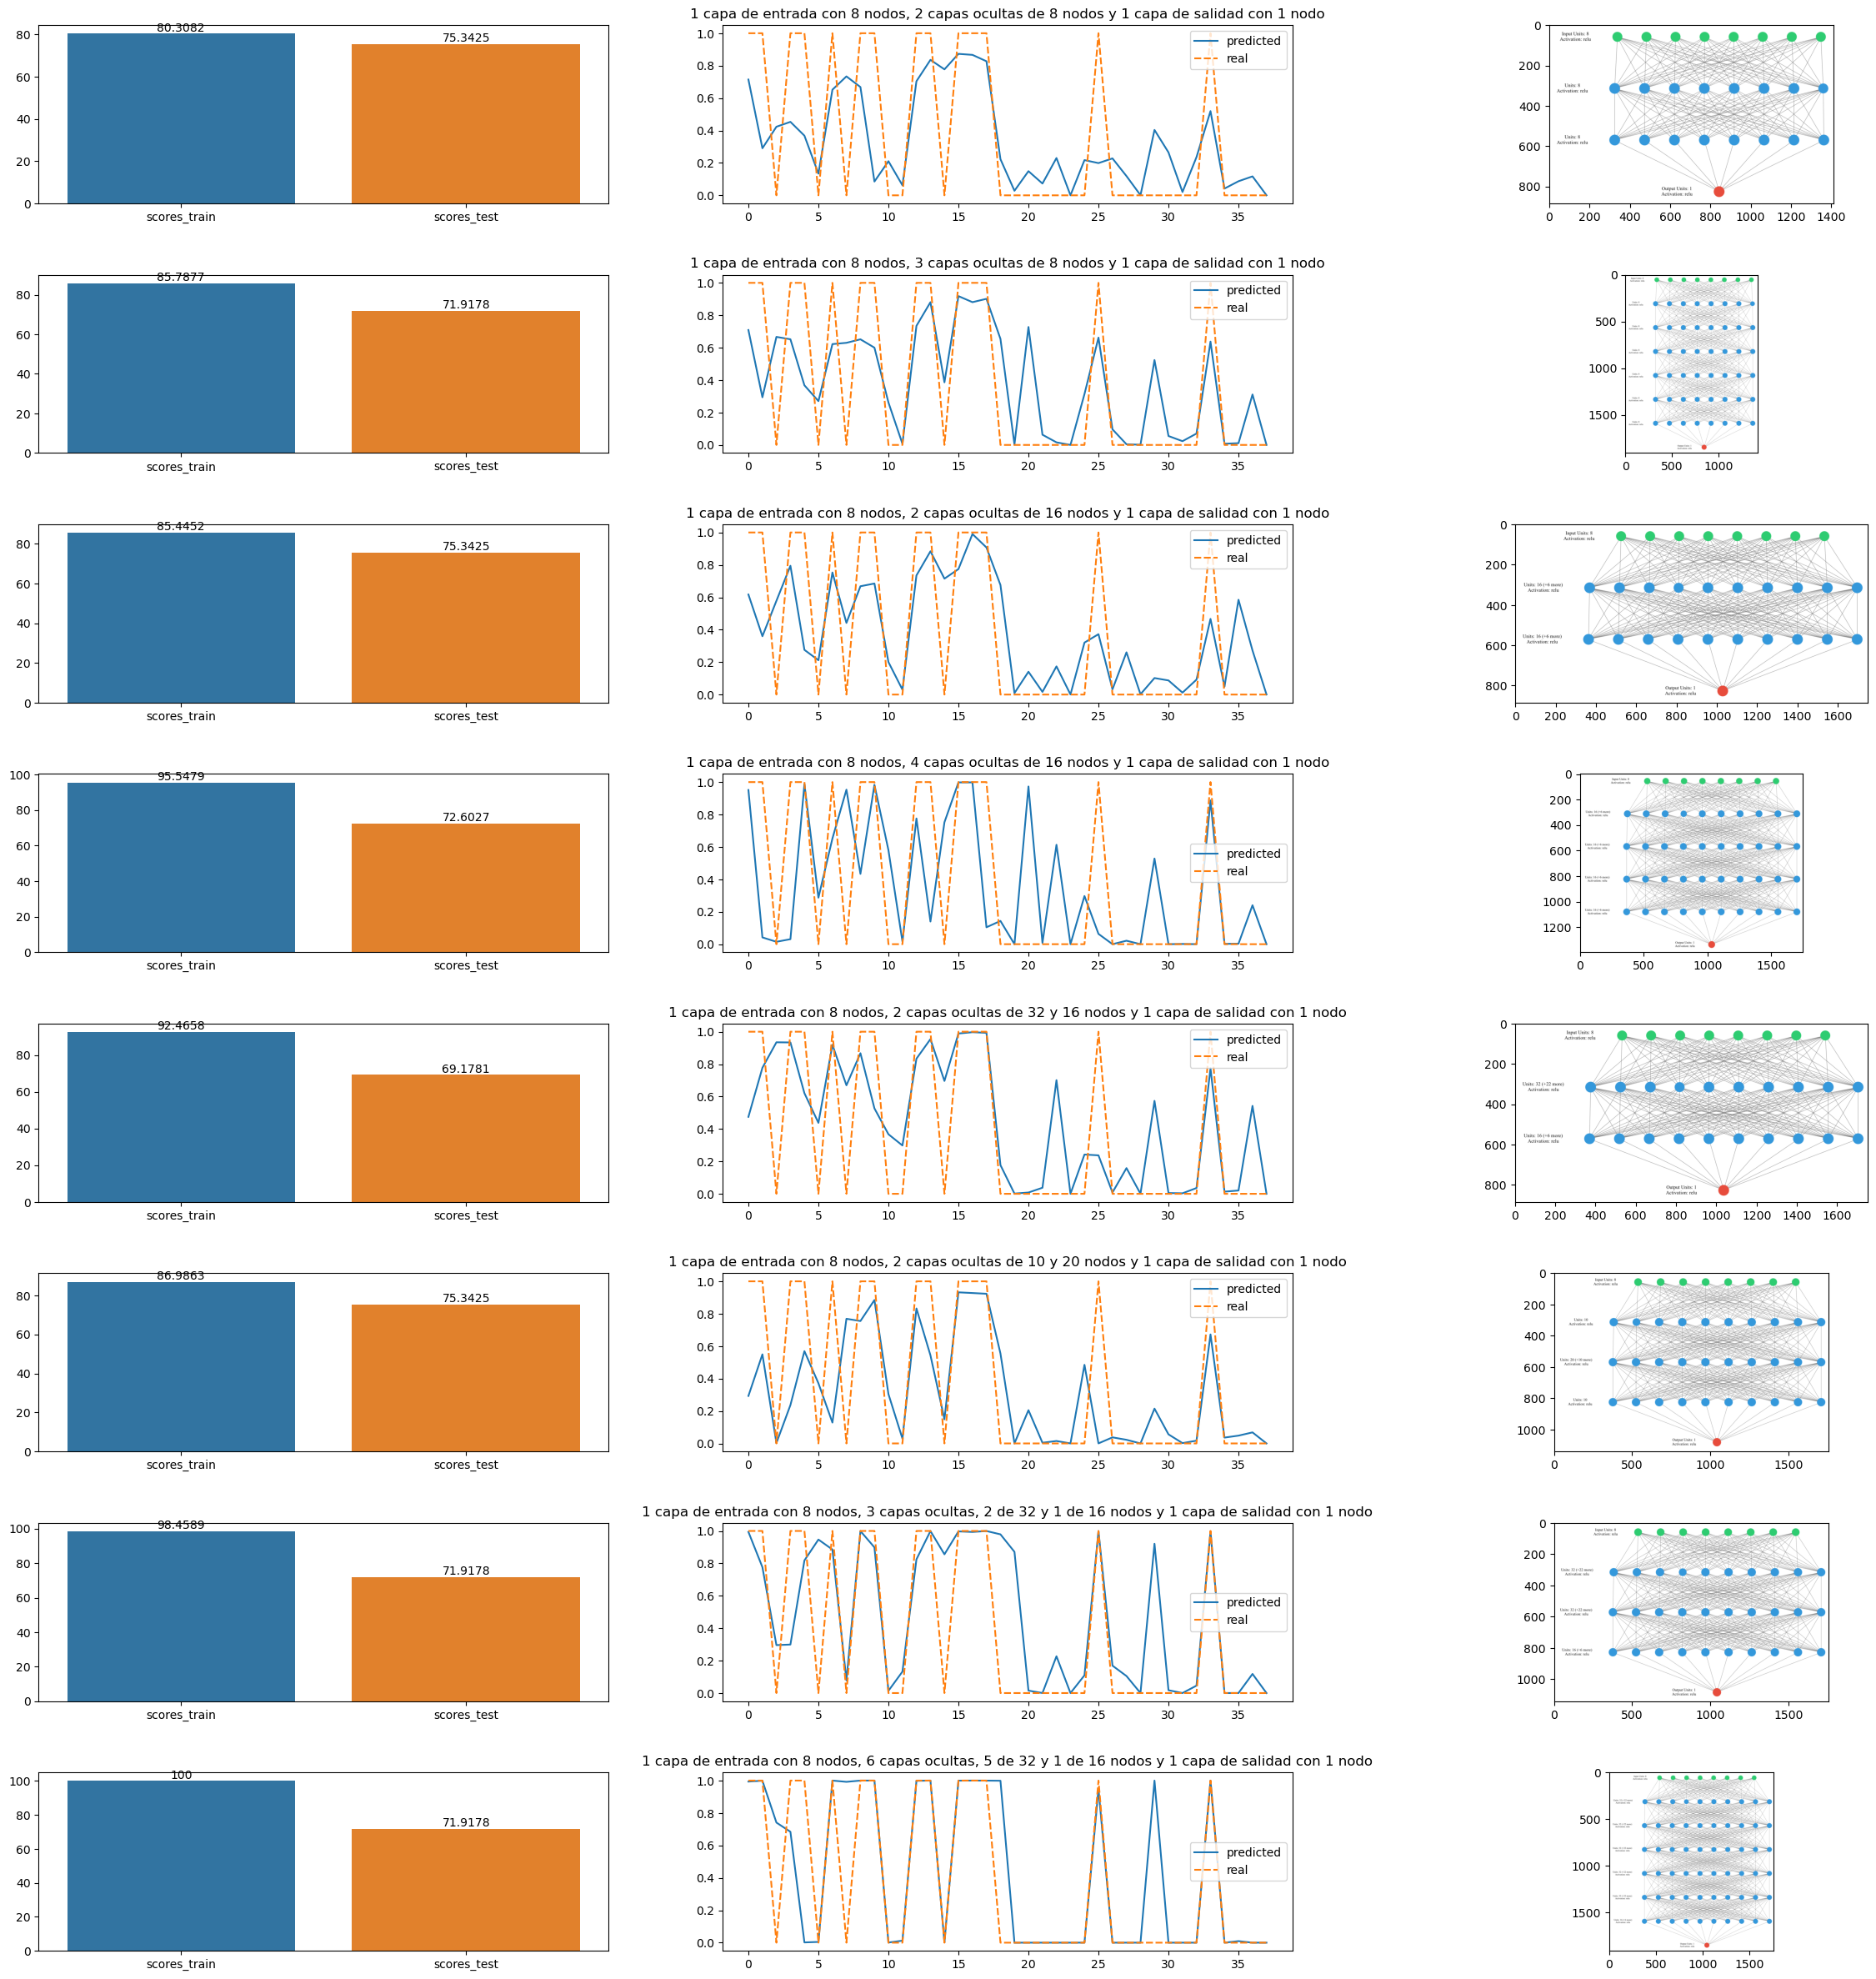

In [7]:
fig, axes = plt.subplots(len(list_models_test), 3,figsize=(30,30))
fig.subplots_adjust(hspace=0.4)

for i,m in enumerate(list_models_test):
    train,test,predictions = test_network(m['model'],str(i),X,y,X_pred,y_test_predicted)
    _= sns.lineplot(ax=axes[i,1],data=predictions)
    ab = sns.barplot(ax=axes[i,0],data=pd.DataFrame([{'scores_train':train[1]*100,'scores_test':test[1]*100}],columns=['scores_train','scores_test']))
    ab.bar_label(ab.containers[0])
    _=axes[i,1].set_title(m['Descripcion'])
    imgpath = path_to_save+'/'+str(i) + '.png'
    img = mpimg.imread(imgpath)
    _= axes[i,2].imshow(img)
